<a href="https://colab.research.google.com/github/abduhsalam/Regression-Analyst/blob/master/Multi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**
Abduh Salam DS0101

Terdapat Problem multiple linear regression penjualan pie dengan 

2 independent variable : Price dan Advertising

1 dependent variable : pie sales

Goal : 
- analisis efek 2 variable price dan advertising
- membangun model multi linear untuk memprediksi variable dependent pie sales

menggunakan liblary pandas, statsmodels, seaborn, matplotlib dan sklearn

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


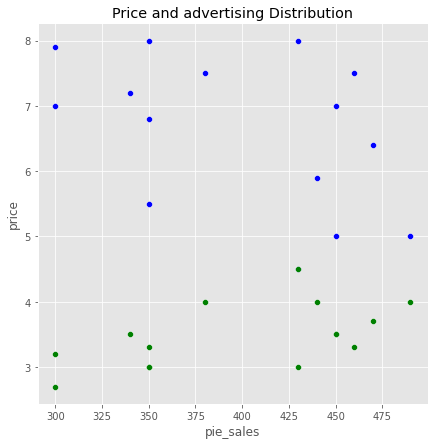

In [37]:
sns.scatterplot(x='pie_sales' ,y = "price",data= df_pie, color= "blue").set_title("Price and advertising Distribution")
sns.scatterplot(x='pie_sales' ,y = "advertising",data= df_pie, color= "green")

In [48]:
X = df_pie[['price','advertising']]
Y = df_pie['pie_sales']

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


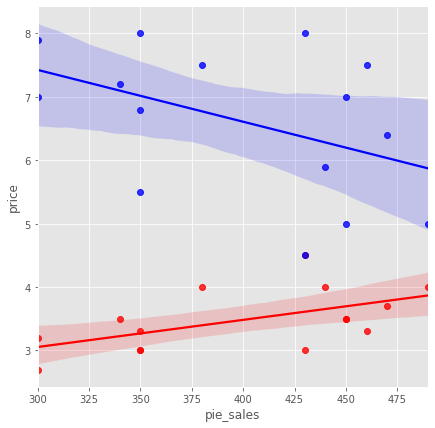

In [45]:
sns.regplot(x=df_pie.pie_sales, y=df_pie.advertising, color='red')
sns.regplot(x=df_pie.pie_sales, y=df_pie.price, color='blue')

Didapat nilai b1=-24.975 dan b2=74.131. 
dapat dilihat nilai b1 bernilai negatif hal ini menunjukan semakin rendah nilai harga semakin tinggi nilai penjualan, 
sedangkan nilai b2 bernilai positif menunjukan semakin tinggi nilai periklanan semakin tinggi nilai penjualan.

In [19]:
# prediction with sklearn
ads = 4
price = 6
print ('Predicted  pie sales with price : ',price,' and ads : ',ads,' \n', regr.predict([[price, ads]]))

Predicted  pie sales with price :  6  and ads :  4  
 [453.19948613]


In [7]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0120
Time:                        08:55:09   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

# **Analisis Model**

**Adj. R-squared**

---
didapat nilai adj. R-squared = 0.442. nilai ini menunjukan model yang dibangun kurang baik.


**Testing positive auto correlation**


---


Durbin-watson = 1.683 

jika n = 25 dan k = 2, menggunakan durbin watson table nilai dl=1.206 dan du=1.550. Maka dapat disimpulkan 2 variable tersebut tidak ada positif autocorrelation.

**Inferences about the slope**

---

price nilai fstat = 0.040 < 0.05, menunjukan price cukup mempengaruhi nilai price_sales
advertising nilai fstat = 0.014 < 0.05, menunjukan advertising cukup mempengaruhi nilai price_sales

**Kesimpulan**

---

- 2 variable independent cukup mempengaruhi variable dependent
- semakin rendah nilai harga semakin tinggi nilai penjualan
- semakin tinggi nilai periklanan semakin tinggi nilai penjualan
- model yang di bangun tidak baik untuk memprediksi
